<a href="https://colab.research.google.com/github/ironmanjiwon/AI-final_exam/blob/main/%EC%9D%B8%EA%B3%B5%EC%A7%80%EB%8A%A5_%EA%B8%B0%EB%A7%90_12_06_09(%EB%AA%A9).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#RNN: 순차적 시계열 데이터 처리 → 신경망
#순환 신경망
#gradient 소실 문제
#LSTM

In [2]:
#사인파 예측 프로그램

import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

In [3]:
# 윈도우 크기만큼씩 잘라서 훈련 데이터셋 생성
def make_sample(data, window):
    train = []					# 공백 리스트 생성
    target = []
    for i in range(len(data)-window):		# 데이터의 길이만큼 반복
        train.append(data[i:i+window])		# i부터 (i+window-1) 까지를 저장
        target.append(data[i+window])		# (i+window) 번째 요소는 정답
    return np.array(train), np.array(target)	# 파이썬 리스트를 넘파이로 변환 

In [4]:
#시계열 데이터

seq_data = []
for i in np.arange(0, 1000): # 1000개의 샘플
    seq_data += [[np.sin( np.pi * i* 0.01 )]]

X, y = make_sample(seq_data, 10) # 윈도우 크기는 10
print(X.shape, y.shape)
print(X[0],y[0])

(990, 10, 1) (990, 1)
[[0.        ]
 [0.03141076]
 [0.06279052]
 [0.09410831]
 [0.12533323]
 [0.15643447]
 [0.18738131]
 [0.21814324]
 [0.24868989]
 [0.27899111]] [0.30901699]


In [5]:
# 모델 생성
model = Sequential()
model.add(SimpleRNN(10, activation='tanh', input_shape=(10,1))) # 10개의 셀
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse')

Epoch 1/100
31/31 [==============================] - 2s 6ms/step - loss: 1.8873
Epoch 2/100
31/31 [==============================] - 0s 7ms/step - loss: 0.9728
Epoch 3/100
31/31 [==============================] - 0s 7ms/step - loss: 0.2212
Epoch 4/100
31/31 [==============================] - 0s 7ms/step - loss: 0.0565
Epoch 5/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0239
Epoch 6/100
31/31 [==============================] - 0s 7ms/step - loss: 0.0151
Epoch 7/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0127
Epoch 8/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0116
Epoch 9/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0107
Epoch 10/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0100
Epoch 11/100
31/31 [==============================] - 0s 5ms/step - loss: 0.0093
Epoch 12/100
31/31 [==============================] - 0s 6ms/step - loss: 0.0087
Epoch 13/100
31/31 [=================

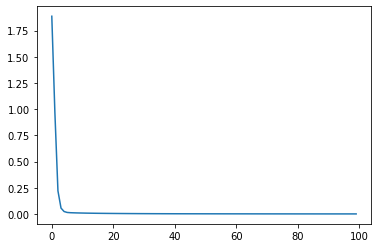

In [6]:
# 학습
history = model.fit(X, y, epochs=100, verbose=1)
plt.plot(history.history['loss'], label="loss")
plt.show()

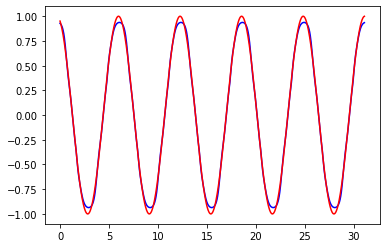

In [7]:
# 테스트
seq_data = []
for i in np.arange(0, 1000):			# 테스트 샘플 생성
    seq_data += [[np.cos( np.pi * i* 0.01 )]]
X, y = make_sample(seq_data, 10)		# 윈도우 크기=10

y_pred = model.predict(X, verbose=0)		# 테스트 예측값
plt.plot(np.pi * np.arange(0, 990)*0.01, y_pred, 'b' )
plt.plot(np.pi * np.arange(0, 990)*0.01, y,'r' )
plt.show()

In [8]:
#주가 예측

!pip install finance-datareader

import FinanceDataReader as fdr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 48 kB 4.9 MB/s 


In [9]:
samsung = fdr.DataReader('005930', '2016') # 삼성전자-005930, 2016년도 이후 데이터
print(samsung) # 시작값, 최고값, 최저값, 종가, 거래량, 변화율

             Open   High    Low  Close    Volume    Change
Date                                                      
2016-01-04  25200  25200  24100  24100    306939 -0.043651
2016-01-05  24040  24360  23720  24160    216002  0.002490
2016-01-06  24160  24160  23360  23500    366752 -0.027318
2016-01-07  23320  23660  23020  23260    282388 -0.010213
2016-01-08  23260  23720  23260  23420    257763  0.006879
...           ...    ...    ...    ...       ...       ...
2022-06-03  67200  67300  66800  66800   8222883  0.001499
2022-06-07  66200  66400  65400  65500  19355755 -0.019461
2022-06-08  65400  65700  65300  65300  12483180 -0.003053
2022-06-09  65100  65200  64500  65200  25790725 -0.001531
2022-06-10  64000  64400  63800  63800  22022851 -0.021472

[1582 rows x 6 columns]


In [12]:
LGenergysolution = fdr.DataReader('373220', '2022')
print(LGenergysolution)

              Open    High     Low   Close    Volume    Change
Date                                                          
2022-01-27  597000  598000  450000  505000  15946992       NaN
2022-01-28  476000  483000  445000  450000   4559773 -0.108911
2022-02-03  458000  495500  441000  477000   2918435  0.060000
2022-02-04  476500  505000  476000  504000   2088996  0.056604
2022-02-07  520000  548000  511000  548000   1911176  0.087302
...            ...     ...     ...     ...       ...       ...
2022-06-03  443500  444000  437500  437500    154981 -0.006810
2022-06-07  436500  439500  432000  432000    180249 -0.012571
2022-06-08  432500  434500  422500  425500    215828 -0.015046
2022-06-09  426000  426000  419000  422500    208712 -0.007051
2022-06-10  418000  426000  412500  425000    283876  0.005917

[89 rows x 6 columns]


In [13]:
SAMBU = fdr.DataReader('001470', '2021')
print(SAMBU)

            Open  High   Low  Close   Volume    Change
Date                                                  
2021-01-04  4300  4620  4250   4525  6616139 -0.012009
2021-01-05  4445  4495  4315   4380  4960766 -0.032044
2021-01-06  4370  4805  4300   4470  9739927  0.020548
2021-01-07  4520  4760  4480   4600  8962447  0.029083
2021-01-08  4625  4660  4405   4415  5380553 -0.040217
...          ...   ...   ...    ...      ...       ...
2022-06-03  2215  2225  2190   2200  1705617  0.004566
2022-06-07  2205  2215  2150   2170  1470661 -0.013636
2022-06-08  2175  2180  2130   2135  1644772 -0.016129
2022-06-09  2115  2145  2060   2130  2102248 -0.002342
2022-06-10  2105  2140  2065   2065  1454979 -0.030516

[355 rows x 6 columns]


In [14]:
openValues = samsung[['Open']]

openValues

,Open
Date,
2016-01-04,25200
2016-01-05,24040
2016-01-06,24160
2016-01-07,23320
2016-01-08,23260
...,...
2022-06-03,67200
2022-06-07,66200
2022-06-08,65400


In [15]:
from sklearn.preprocessing import MinMaxScaler #정규화
scaler = MinMaxScaler(feature_range = (0, 1))
scaled = scaler.fit_transform(openValues) # ndarray 반환

scaled

array([[0.27906977],
       [0.2662237 ],
       [0.2675526 ],
       ...,
       [0.72425249],
       [0.72093023],
       [0.70874862]])

In [16]:
# 훈련 데이터와 테스트 데이터 분리
TEST_SIZE = 200
train_data = scaled[:-TEST_SIZE]
test_data = scaled[-TEST_SIZE:]

train_data.shape

(1382, 1)

In [17]:
# 순차 훈련 데이터 생성
def make_sample(data, window):
    train = []
    target = []
    for i in range(len(data)-window):
        train.append(data[i:i+window])
        target.append(data[i+window])
    return np.array(train), np.array(target)

X_train, y_train = make_sample(train_data, 30)

print(X_train.shape, y_train.shape)
print(X_train[0],y_train[0])

(1352, 30, 1) (1352, 1)
[[0.27906977]
 [0.2662237 ]
 [0.2675526 ]
 [0.25825028]
 [0.25758583]
 [0.25603544]
 [0.25426357]
 [0.25537099]
 [0.25049834]
 [0.25249169]
 [0.24097453]
 [0.24983389]
 [0.25692137]
 [0.25094131]
 [0.25359911]
 [0.25957918]
 [0.25581395]
 [0.24939092]
 [0.25780731]
 [0.25249169]
 [0.2551495 ]
 [0.25714286]
 [0.25470653]
 [0.25470653]
 [0.25603544]
 [0.24761905]
 [0.25027685]
 [0.25559247]
 [0.25647841]
 [0.26112957]] [0.26644518]


In [18]:
# LSTM 구축
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(LSTM(16, 
                input_shape=(X_train.shape[1], 1), 
                activation='tanh', 
                return_sequences=False)
          )
model.add(Dense(1))

model.compile(optimizer = 'adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs = 100, batch_size = 16)

Epoch 1/100
85/85 [==============================] - 4s 11ms/step - loss: 0.1190
Epoch 2/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0054
Epoch 3/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0019
Epoch 4/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 5/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 6/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0015
Epoch 7/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 8/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 9/100
85/85 [==============================] - 1s 12ms/step - loss: 0.0014
Epoch 10/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 11/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 12/100
85/85 [==============================] - 1s 11ms/step - loss: 0.0014
Epoch 13/100
85/85 [=====

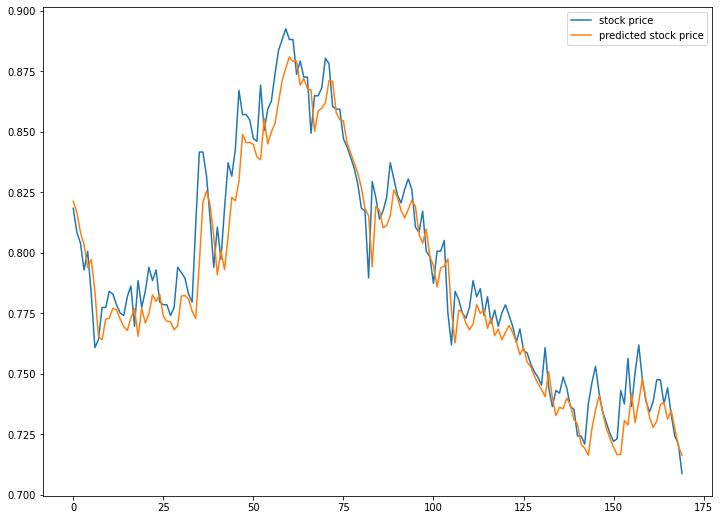

In [19]:
# 테스트
X_test, y_test = make_sample(test_data, 30)
pred = model.predict(X_test)

import matplotlib.pyplot as plt
plt.figure(figsize=(12, 9))
plt.plot(y_test, label='stock price')
plt.plot(pred, label='predicted stock price')
plt.legend()
plt.show()